In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
X_train = pd.read_csv('CreditCardFraudTrainData.csv')
X_test = pd.read_csv('CreditCardFraudTestData.csv')

In [3]:
X_train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [4]:
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [5]:
X_train.describe

<bound method NDFrame.describe of          Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutm

In [6]:
X_train.shape

(1296675, 23)

In [7]:
X_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
#concatenating the two datasets
df = pd.concat([X_train, X_test]).reset_index()

In [9]:
df.head(10)

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [10]:
#dropping of first 2 unnecceasry columns
df.drop(df.columns[:2], axis=1, inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
#looking at the number of unique values in the dataset
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [12]:
#converting trans_date_trans_time into datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
print(df.dtypes['trans_date_trans_time'])
df.head()

datetime64[ns]


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
#setting plot style
plt.style.use('seaborn-darkgrid')

#setting backend for matplotlib
%matplotlib inline

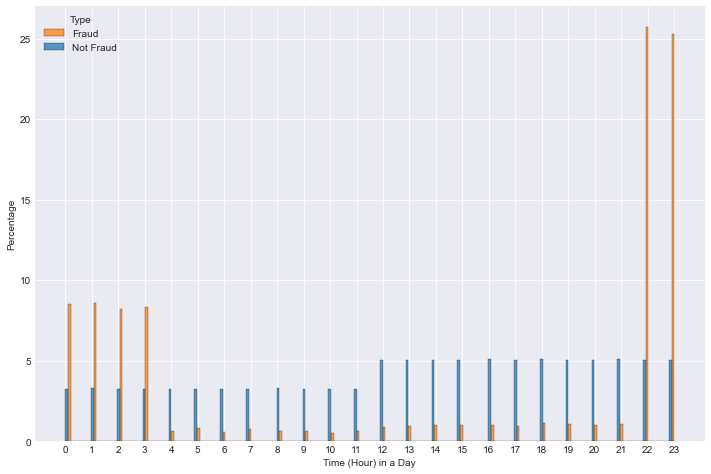

In [14]:
#time in a day vs fraud
fix, ax = plt.subplots(figsize=(12,8))
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [15]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
#deriving 'year_month'
df['trans_year_month'] = df['trans_date_trans_time'].dt.to_period('M')

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,trans_hour,trans_day_of_week,trans_year_month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,0,Tuesday,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,0,Tuesday,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,0,Tuesday,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,0,Tuesday,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,0,Tuesday,2019-01


In [16]:
import warnings
warnings.filterwarnings("ignore")

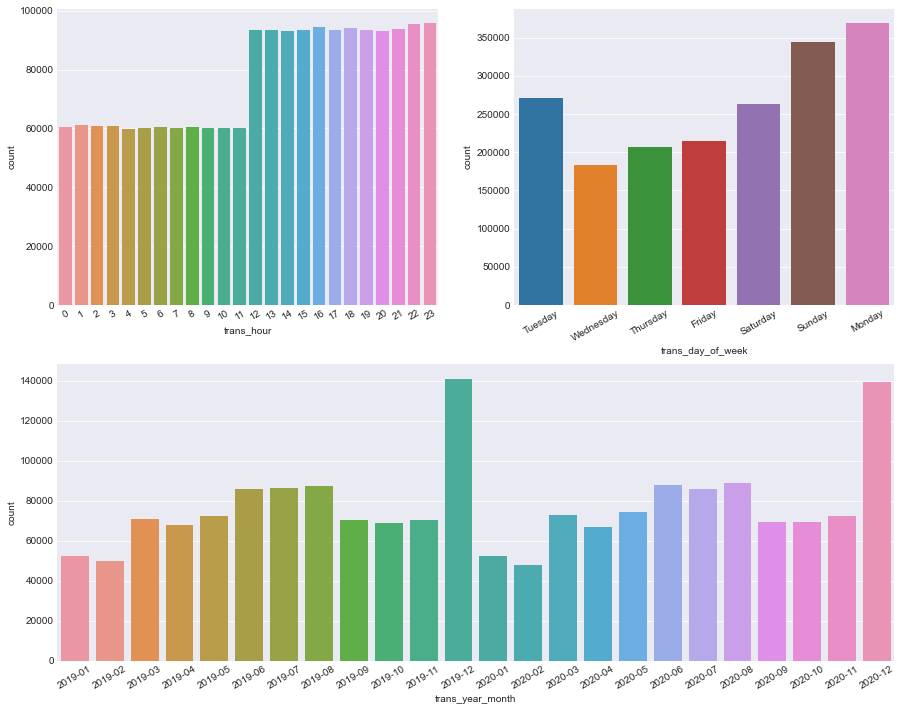

In [17]:
fix, ax = plt.subplots(figsize=(15,12))

plot = [0,0,0]
#plotting the 'trans_hour' feature
plot[0] = sns.countplot(df.trans_hour, ax = plt.subplot(221))
#plotting the 'trans_day_of_week' feature
plot[1] = sns.countplot(df.trans_day_of_week, ax = plt.subplot(222))
#plotting the 'trans_year_month' feature
plot[2] = sns.countplot(df.trans_year_month, ax = plt.subplot(212))

for i in plot:
  i.set_xticklabels(i.get_xticklabels(), rotation=30)
plt.show()

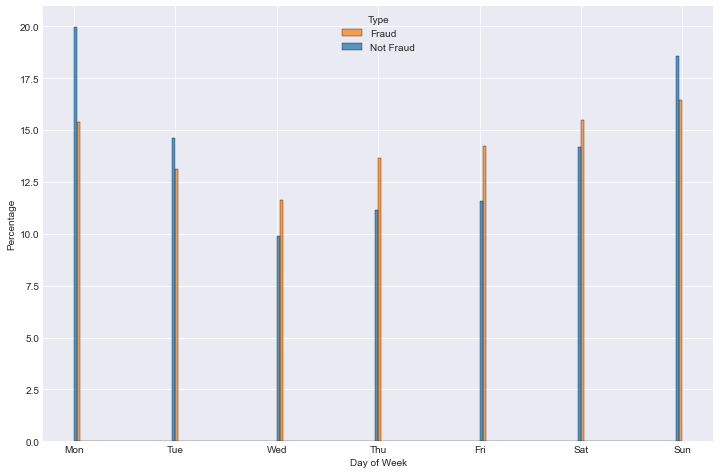

In [18]:
#day of week vs fraud
fix, ax = plt.subplots(figsize=(12,8))
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

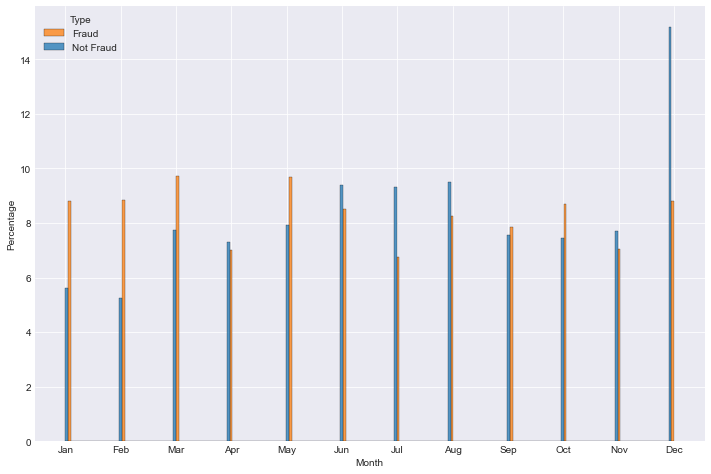

In [19]:
#month vs fraud
fix, ax = plt.subplots(figsize=(12,8))
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [20]:
#finding age
#converting 'dob' column to datetime
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - 
                      df['dob'])/np.timedelta64(1, 'Y'))
df.age.head()

0    31.0
1    41.0
2    57.0
3    52.0
4    33.0
Name: age, dtype: float64

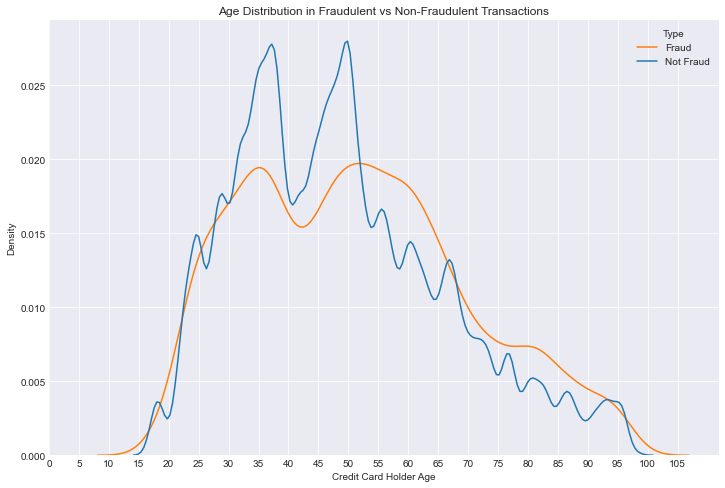

In [21]:
#age vs fraud
import datetime as dt
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
fix, ax = plt.subplots(figsize=(12,8))
ax=sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [22]:
#dropping variables
df.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,merch_lat,merch_long,is_fraud,hour,trans_hour,trans_day_of_week,trans_year_month,day,month,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,36.011293,-82.048315,0,0,0,Tuesday,2019-01,1,1,34
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,49.159047,-118.186462,0,0,0,Tuesday,2019-01,1,1,44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,43.150704,-112.154481,0,0,0,Tuesday,2019-01,1,1,60
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,47.034331,-112.561071,0,0,0,Tuesday,2019-01,1,1,55
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,38.674999,-78.632459,0,0,0,Tuesday,2019-01,1,1,36


In [23]:
df.isna().sum()

cc_num               0
merchant             0
category             0
amt                  0
gender               0
street               0
city                 0
state                0
zip                  0
lat                  0
long                 0
city_pop             0
job                  0
trans_num            0
unix_time            0
merch_lat            0
merch_long           0
is_fraud             0
hour                 0
trans_hour           0
trans_day_of_week    0
trans_year_month     0
day                  0
month                0
age                  0
dtype: int64

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
#checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column             Dtype    
---  ------             -----    
 0   cc_num             int64    
 1   merchant           object   
 2   category           object   
 3   amt                float64  
 4   gender             object   
 5   street             object   
 6   city               object   
 7   state              object   
 8   zip                int64    
 9   lat                float64  
 10  long               float64  
 11  city_pop           int64    
 12  job                object   
 13  trans_num          object   
 14  unix_time          int64    
 15  merch_lat          float64  
 16  merch_long         float64  
 17  is_fraud           int64    
 18  hour               int64    
 19  trans_hour         int64    
 20  trans_day_of_week  object   
 21  trans_year_month   period[M]
 22  day                int64    
 23  month              int64    
 24

In [26]:
df['amt'].describe()

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [27]:
np.percentile(df['amt'],99)

537.9

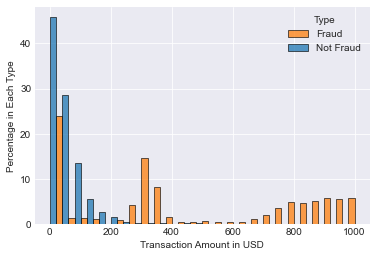

In [28]:
#amount vs fraud
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

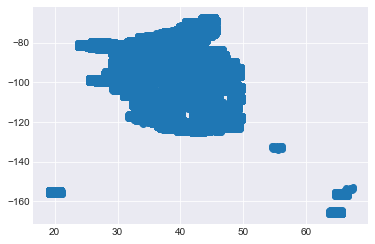

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x=df['merch_lat'], y=df['merch_long'])
plt.show()

In [30]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


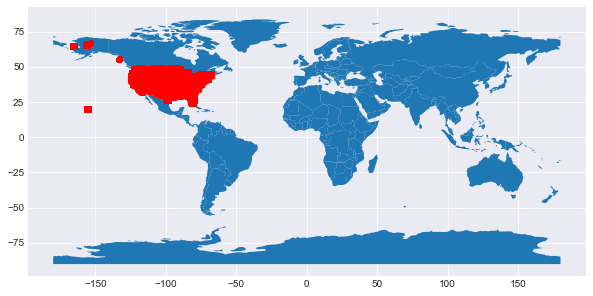

In [32]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(df['merch_long'], df['merch_lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [33]:
#let us check the percentage of fraudulent data points in our dataset
100*df.is_fraud.value_counts(normalize=True)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

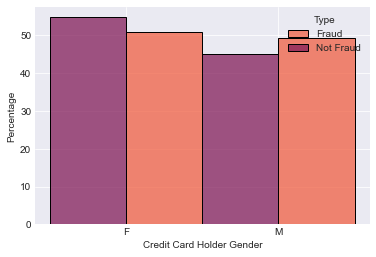

In [34]:
#Gender vs Fraud
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',bins='auto',multiple='dodge',palette="rocket", common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

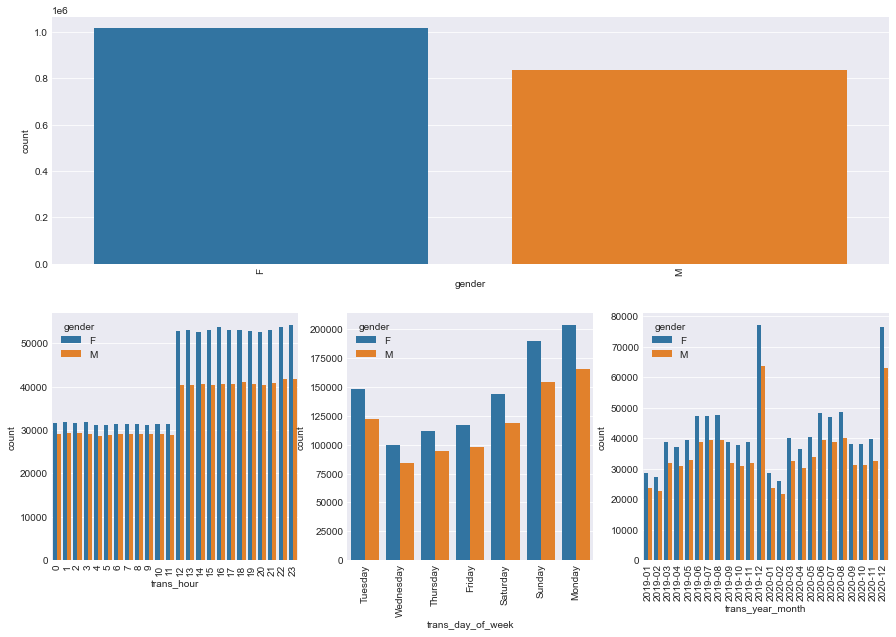

In [35]:
#Gender Data Exploration
fig, ax = plt.subplots(figsize=(15,10))

plot = [0,0,0,0]
#plotting gender demographic with respect to transactions
plot[0] = sns.countplot(df.gender, ax=plt.subplot(211))
#plotting transactions over time, with respect to gender
plot[1] = sns.countplot(df.trans_hour, hue=df.gender, ax=plt.subplot(234))
plot[2] = sns.countplot(df.trans_day_of_week, hue=df.gender, ax=plt.subplot(235))
plot[3] = sns.countplot(df.trans_year_month, hue=df.gender, ax=plt.subplot(236))

for i in plot:
  i.set_xticklabels(i.get_xticklabels(), rotation=90)
plt.show()

In [36]:
#looking at distribution of amount
pd.concat(
    [df['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
     df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amt Distribution'}),
     df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})], axis=1)

,Row Type,Overall Amt Distribution,Non-Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


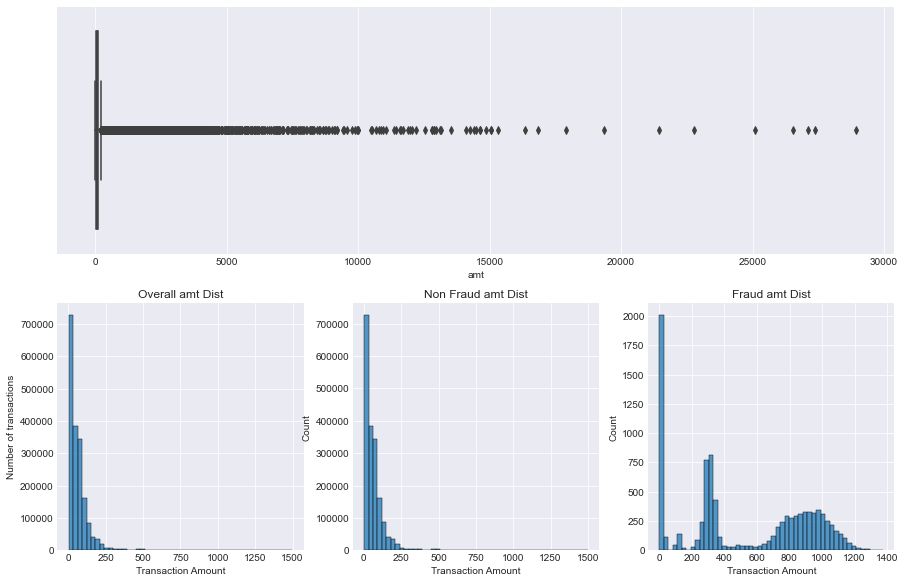

In [37]:
#plotting the above distributions
fig = plt.subplots(figsize=(15,10))

plots = []
#plotting the amt feature
#box plot
plots.append(sns.boxplot(df.amt, ax=plt.subplot(211)))

#distribution plots
plots.append(sns.histplot(df[df.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(df[(df.is_fraud==0) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(df[(df.is_fraud==1) & (df.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[1].set_title('Overall amt Dist')
plots[2].set_title('Non Fraud amt Dist')
plots[3].set_title('Fraud amt Dist')

#setting x labels
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')
plots[3].set_xlabel('Transaction Amount')

#setting y label
plots[1].set_ylabel('Number of transactions')

plt.show()

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

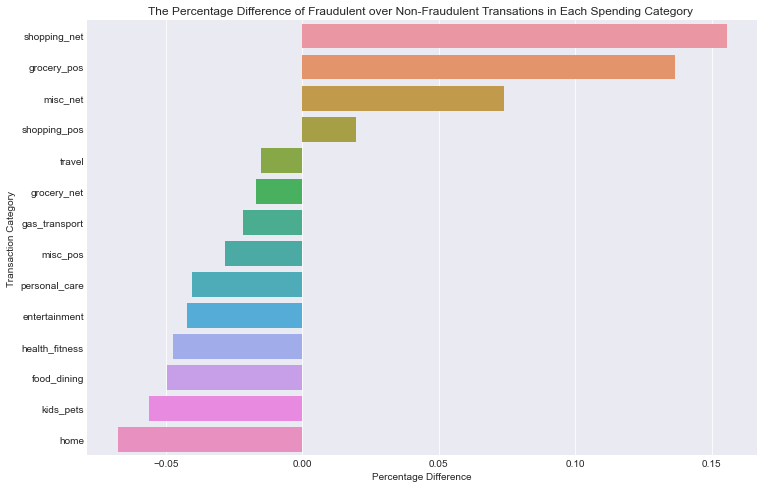

In [38]:
#calculate the percentage difference
fix, ax = plt.subplots(figsize=(12,8))
a=df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns=['category','not fraud percentage']

b=df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns=['category','fraud percentage']
ab=a.merge(b,on='category')
ab['diff']=ab['fraud percentage']-ab['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

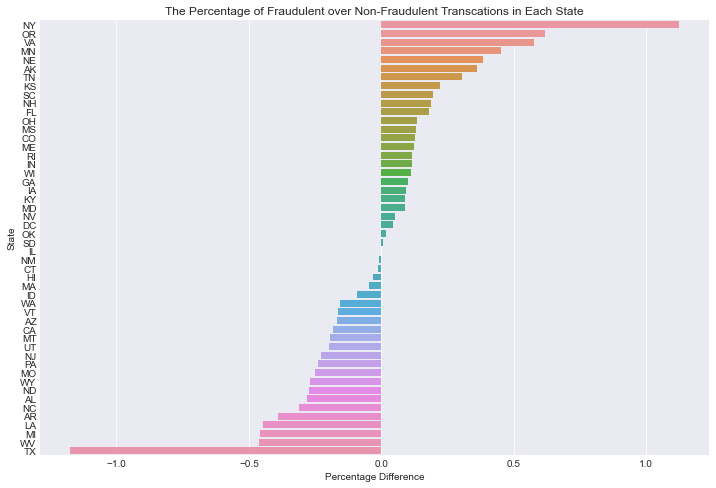

In [39]:
#state vs fraud
fix, ax = plt.subplots(figsize=(12,8))
a=df['state'][df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=df['state'][df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

In [40]:
#year_month vs number of transactions
df_timeline01 = df.groupby(df['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['year_month','num_of_transactions','customers']
df_timeline01

,year_month,num_of_transactions,customers
0,2019-01,52525,913
1,2019-02,49866,918
2,2019-03,70939,916
3,2019-04,68078,913
4,2019-05,72532,910
5,2019-06,86064,908
6,2019-07,86596,910
7,2019-08,87359,911
8,2019-09,70652,913
9,2019-10,68758,912


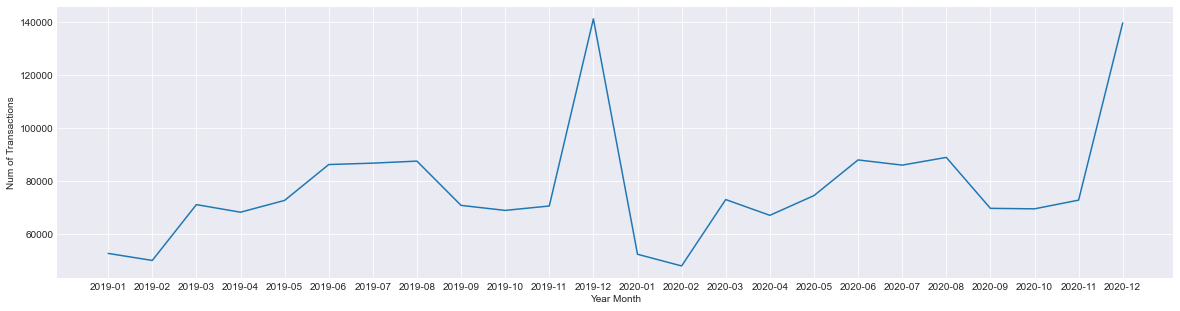

In [41]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline01['num_of_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Num of Transactions')
plt.show()

In [42]:
#year_month vs fraud trasactions and fraud customers.
df_fraud_transactions = df[df['is_fraud']==1]

df_timeline02 = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['year_month','num_of_fraud_transactions','fraud_customers']
df_timeline02

,year_month,num_of_fraud_transactions,fraud_customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


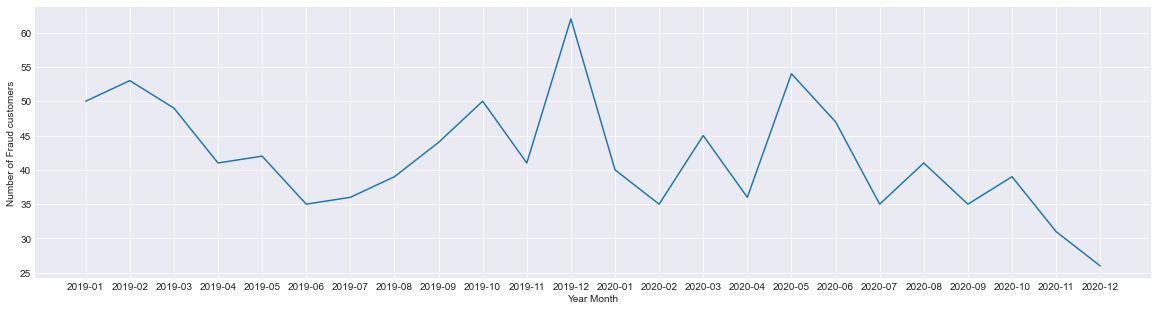

In [43]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline02['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['year_month'])

ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud customers')
plt.show()

In [44]:
#let us first bin the age feature
for i in range(len(df.age)):
  if df.age[i] <= 30:
    df.age[i] = '< 30'
  elif df.age[i] > 30 and df.age[i] <= 45:
    df.age[i] = '30-45'
  elif df.age[i] > 45 and df.age[i] <= 60:
    df.age[i] = '46-60'
  elif df.age[i] > 60 and df.age[i] <= 75:
    df.age[i] = '61-75'
  else:
    df.age[i] = '> 75'

df.age.head()

0    30-45
1    30-45
2    46-60
3    46-60
4    30-45
Name: age, dtype: object

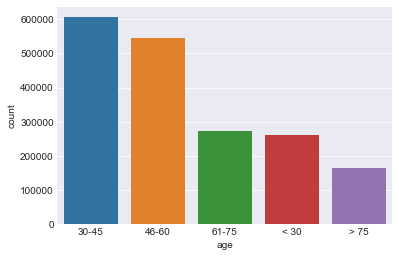

In [45]:
#plotting the age feature in the data
plot = sns.countplot(df.age)

plt.show()

In [46]:
#constructing the age-transaction count distribution
df_age = df[['age','trans_num']].groupby(['age']).count().reset_index()
df_age.columns = ['age', 'age_count']

#creating the age-fraud distribution
df_fraud_age = df[['age', 'trans_num', 'is_fraud']].groupby(['age','is_fraud']).count().reset_index()
df_fraud_age.columns = ['age', 'is_fraud', 'Transaction count']

df_fraud_age = df_fraud_age.merge(df_age[['age', 'age_count']], how='inner', on='age')

df_fraud_age['Transaction percentage'] = (df_fraud_age['Transaction count']/df_fraud_age['age_count'])*100

df_fraud_age

,age,is_fraud,Transaction count,age_count,Transaction percentage
0,30-45,0,603562,606090,99.582900
1,30-45,1,2528,606090,0.417100
2,46-60,0,542406,545222,99.483513
3,46-60,1,2816,545222,0.516487
4,61-75,0,272316,274042,99.370170
5,61-75,1,1726,274042,0.629830
6,< 30,0,259940,261311,99.475338
7,< 30,1,1371,261311,0.524662
8,> 75,0,164519,165729,99.269892
9,> 75,1,1210,165729,0.730108


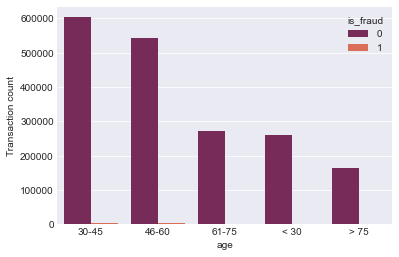

In [47]:
sns.barplot(data=df_fraud_age, y='Transaction count', x='age', hue='is_fraud',palette="rocket")

plt.show()

In [48]:
df.category.value_counts(normalize=True)

gas_transport     0.101506
grocery_pos       0.095115
home              0.094721
shopping_pos      0.089864
kids_pets         0.087307
shopping_net      0.075212
entertainment     0.072403
food_dining       0.070573
personal_care     0.070225
health_fitness    0.066159
misc_pos          0.061666
misc_net          0.048939
grocery_net       0.035024
travel            0.031287
Name: category, dtype: float64

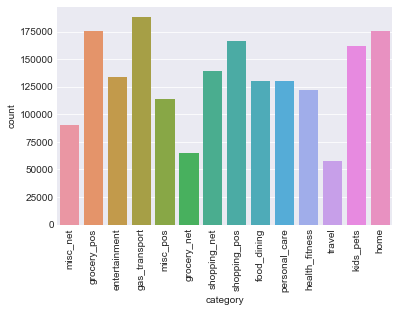

In [49]:
#plotting the category wise counts
plot = sns.countplot(df.category)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

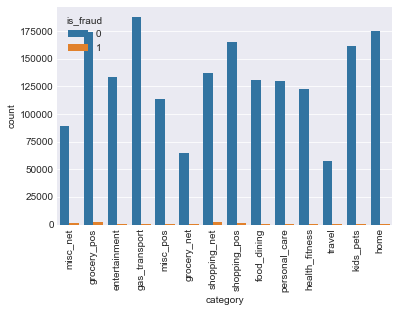

In [50]:
#let us see the number of fraudulent transaction in these categories
plot = sns.countplot(df.category, hue=df.is_fraud)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.show()

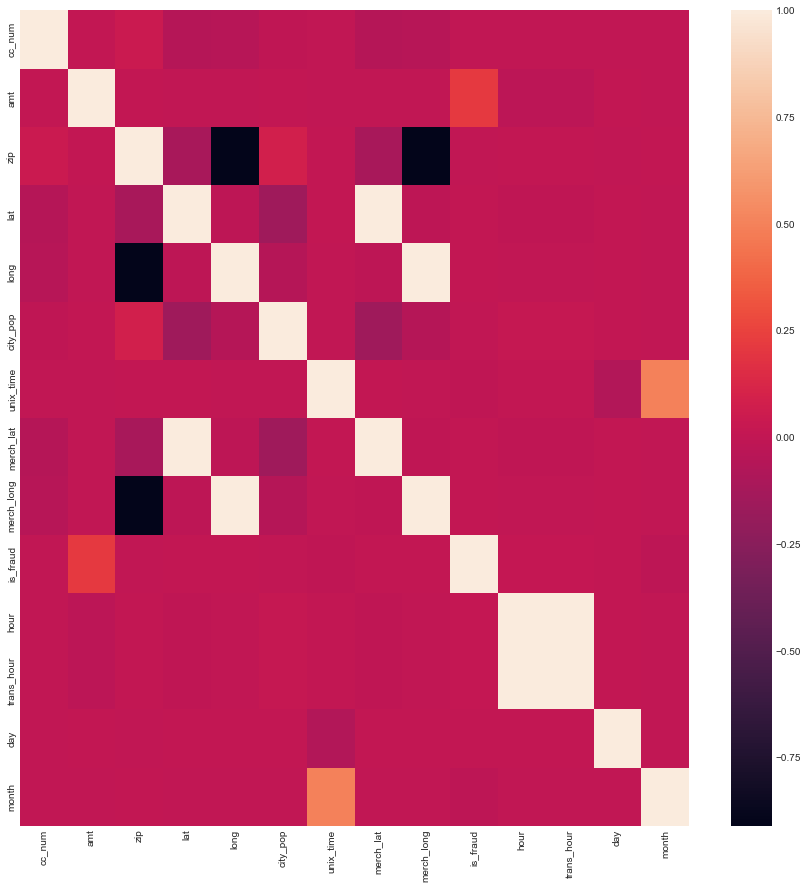

In [51]:
#let us now check the correlations between the columns
df_random_under_corr = df.corr()
#plotting the correlation heatplot
plt.figure(figsize=(15,15))
sns.heatmap(df_random_under_corr)
plt.show()

In [52]:
#subset the training data to include only the features that we need
train=df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
#convert category to dummy variables
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

## FITTING WITH MODELS

In [53]:
df1 = df
df1.drop(['merchant','street','city','state','job',
          'category','gender','trans_day_of_week','cc_num', 
          'age'],axis=1, inplace=True)
df1.columns


Index(['amt', 'zip', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'hour', 'trans_hour',
       'trans_year_month', 'day', 'month', 'geometry'],
      dtype='object')

In [54]:
df1.head()

,amt,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,trans_hour,trans_year_month,day,month,geometry
0,4.97,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,0,2019-01,1,1,POINT (-82.04832 36.01129)
1,107.23,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,0,2019-01,1,1,POINT (-118.18646 49.15905)
2,220.11,83252,42.1808,-112.2620,4154,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,0,2019-01,1,1,POINT (-112.15448 43.15070)
3,45.00,59632,46.2306,-112.1138,1939,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,0,2019-01,1,1,POINT (-112.56107 47.03433)
4,41.96,24433,38.4207,-79.4629,99,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,0,2019-01,1,1,POINT (-78.63246 38.67500)


In [55]:
#storing the number of values in each class
non_fraud_count, fraud_count = df1.is_fraud.value_counts()

In [56]:
#storing the numerical columns of the data and removing unnecessary variables
df_num = df1.select_dtypes(include='number')
df_num.drop(['zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long'],
            axis=1, inplace=True)
df_num.columns

Index(['amt', 'is_fraud', 'hour', 'trans_hour', 'day', 'month'], dtype='object')

In [57]:
#innput-output split
X = df_num.drop(['is_fraud'],axis=1)
y = df_num.is_fraud

In [58]:
#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [59]:
#scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [60]:
#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
#train-test split using stratified K fold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

y_train.value_counts()

0    921372
1      4825
Name: is_fraud, dtype: int64

# Logistic Regression

In [62]:
lr = LogisticRegression(random_state=50)
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 0 0]
y_test_pred:  [0 0 0 ... 0 0 0]


In [63]:
accuracy = model.score(X_test, y_test_pred) 
accuracy

1.0

In [64]:
#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve

In [65]:
#evaluating the model
model_name = 'Logistic Regression'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#creating a dataframe to compare the performance of different models
model_eval_data = [[model_name, train_score, test_score, acc_score, f_score, precision, recall]]
evaluate_df = pd.DataFrame(model_eval_data, columns=['Model Name', 'Training Score', 'Testing Score', 'Accuracy',
                                          'F1 Score', 'Precision', 'Recall'])
evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.0,0.0


## Balancing data with undersampling and Oversampling

In [66]:
#renaming X_test and y_test variables
test_input = X_test.copy()
test_output = y_test.copy()

test_output.value_counts(normalize=True)

0    0.994789
1    0.005211
Name: is_fraud, dtype: float64

In [67]:
#storing all fraud transactions
fraud_trans = df_num[df_num['is_fraud'] == 1]
non_fraud_trans = df_num[df_num['is_fraud'] == 0]

print('fraud data shape: ', fraud_trans.shape)
print('non fraud data shape: ', non_fraud_trans.shape)

#printing fraud data percentage
print('Fraud Data percentage: ', 100*(len(fraud_trans)/len(non_fraud_trans)))

fraud data shape:  (9651, 6)
non fraud data shape:  (1842743, 6)
Fraud Data percentage:  0.5237301132062366


In [68]:
#random under sampling using imblearn
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

y_rus.value_counts()

0    4825
1    4825
Name: is_fraud, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=50, stratify=y_rus)

In [70]:
y_train.value_counts()

1    3378
0    3377
Name: is_fraud, dtype: int64

In [71]:
#creating a baseline linear model
lr = LogisticRegression(random_state=50)
#model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [72]:
#predicting on imbalanced test data
test_pred=model.predict(test_input)
test_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [73]:
#printing the classification report of the model
print(classification_report(test_output,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    921371
           1       0.07      0.76      0.13      4826

    accuracy                           0.95    926197
   macro avg       0.53      0.85      0.55    926197
weighted avg       0.99      0.95      0.97    926197



In [74]:
print(confusion_matrix(test_output,test_pred))

[[873125  48246]
 [  1181   3645]]


In [75]:
cf_matrix = confusion_matrix(test_output,test_pred)

Text(66.5, 0.5, 'predicted label')

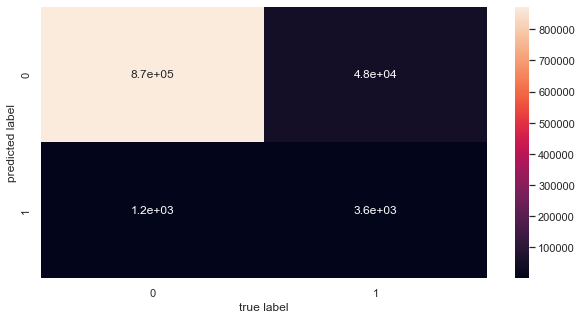

In [76]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [77]:
#evaluating the model
model_name = 'Logistic Regression - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284


In [78]:
#oversampling with imblearn
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train,y_train)

y_ros.value_counts()

0    3378
1    3378
Name: is_fraud, dtype: int64

In [79]:
#train Test split
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, stratify=y_ros, random_state=50)
y_train.value_counts()

1    2365
0    2364
Name: is_fraud, dtype: int64

In [80]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [81]:
test_pred = model.predict(test_input)
test_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [82]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    921371
           1       0.07      0.76      0.13      4826

    accuracy                           0.95    926197
   macro avg       0.54      0.85      0.55    926197
weighted avg       0.99      0.95      0.97    926197



In [83]:
print(confusion_matrix(test_output,test_pred))

[[873957  47414]
 [  1173   3653]]


In [84]:
cf_matrix = confusion_matrix(test_output,test_pred)

Text(66.5, 0.5, 'predicted label')

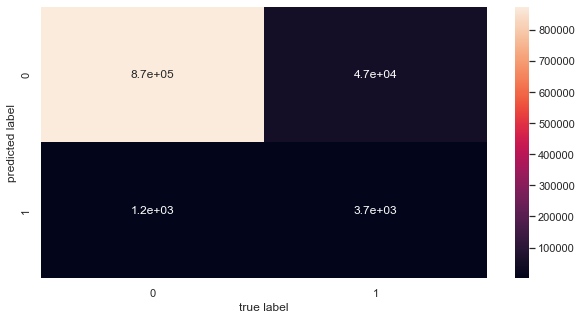

In [85]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [86]:
#evaluating the model
model_name = 'Logistic Regression - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942


In [87]:
#balancing using SMOTE method
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train.astype('float'), y_train)

y_sm.value_counts()

1    2365
0    2365
Name: is_fraud, dtype: int64

In [88]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=50, stratify=y_sm)
y_train.value_counts()

1    1656
0    1655
Name: is_fraud, dtype: int64

In [89]:
#implementing logistic regression
lr = LogisticRegression(random_state=42)
#creating model
model = lr.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [90]:
test_pred = model.predict(test_input)
test_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [91]:
#printing classification report
print(classification_report(test_output, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    921371
           1       0.07      0.76      0.13      4826

    accuracy                           0.95    926197
   macro avg       0.53      0.85      0.55    926197
weighted avg       0.99      0.95      0.97    926197



In [92]:
#evaluating the model
model_name = 'Logistic Regression - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491


## SVM

In [93]:
from sklearn.svm import SVC

In [94]:
model = SVC(kernel = "rbf")

In [95]:
model.fit(X_train, y_train)

SVC()

In [96]:
y_train_pred = model.predict(X_train)
print('y_train_pred: ',y_train_pred)
y_test_pred = model.predict(X_test)
print('y_test_pred: ', y_test_pred)

y_train_pred:  [0 0 0 ... 0 1 1]
y_test_pred:  [1 0 0 ... 1 0 1]


In [97]:
print(confusion_matrix(y_test,y_test_pred))

[[677  33]
 [134 575]]


Text(66.5, 0.5, 'predicted label')

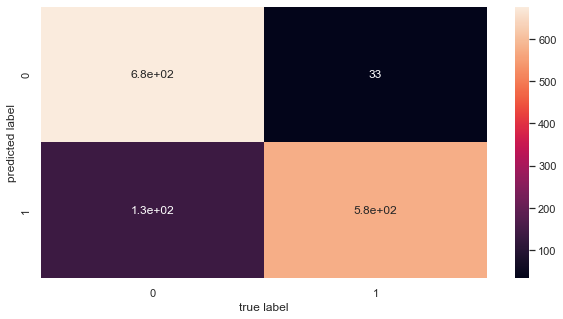

In [98]:
cf_matrix = confusion_matrix(y_test,y_test_pred)
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [99]:
#evaluating the model
model_name = 'Support Vector Machine'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001


In [100]:
# SVM oversampling
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, random_state=50)

svm = SVC(kernel = "rbf")

model = svm.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'SVM - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    921371
           1       0.06      0.79      0.12      4826

    accuracy                           0.94    926197
   macro avg       0.53      0.87      0.54    926197
weighted avg       0.99      0.94      0.96    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203


In [101]:
#SVM UnderSampling
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.3, random_state=50)
svm = SVC(kernel = "rbf")

model = svm.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'SVM - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    921371
           1       0.07      0.79      0.14      4826

    accuracy                           0.95    926197
   macro avg       0.54      0.87      0.55    926197
weighted avg       0.99      0.95      0.97    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303


In [102]:
#SVM Smote
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=50)

svm = SVC(kernel = "rbf")

model = svm.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'SVM - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    921371
           1       0.08      0.78      0.14      4826

    accuracy                           0.95    926197
   macro avg       0.54      0.87      0.56    926197
weighted avg       0.99      0.95      0.97    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185


## Random Forest

In [103]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

In [104]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini')

In [105]:
model = rf.fit(X_train,y_train)

In [106]:
y_test_pred = model.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552879
           1       0.58      0.42      0.49      2840

    accuracy                           1.00    555719
   macro avg       0.79      0.71      0.74    555719
weighted avg       0.99      1.00      1.00    555719



In [107]:
print(confusion_matrix(y_test,y_test_pred))

[[552001    878]
 [  1648   1192]]


In [108]:
cf_matrix = confusion_matrix(y_test,y_test_pred)

Text(66.5, 0.5, 'predicted label')

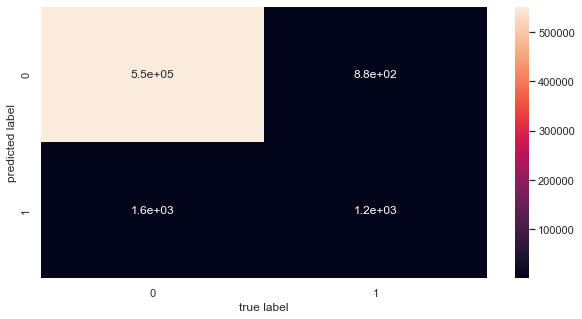

In [109]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [110]:
#evaluating the model
model_name = 'Random Forest - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185
8,Random Forest - without balancing,0.999911,0.995455,0.995455,0.995100,0.575845,0.419718


In [111]:
# Randomforest oversampling
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, random_state=50)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    921371
           1       0.06      0.91      0.12      4826

    accuracy                           0.93    926197
   macro avg       0.53      0.92      0.54    926197
weighted avg       0.99      0.93      0.96    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185
8,Random Forest - without balancing,0.999911,0.995455,0.995455,0.995100,0.575845,0.419718
9,Random Forest - Random Over Sampling,1.000000,0.924026,0.930027,0.959169,0.064121,0.914215


In [112]:

#Undersampling Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.3, random_state=50)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    921371
           1       0.07      0.92      0.12      4826

    accuracy                           0.93    926197
   macro avg       0.53      0.92      0.54    926197
weighted avg       0.99      0.93      0.96    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185
8,Random Forest - without balancing,0.999911,0.995455,0.995455,0.995100,0.575845,0.419718
9,Random Forest - Random Over Sampling,1.000000,0.924026,0.930027,0.959169,0.064121,0.914215


In [113]:
#Random Forest Smote
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=50)

rf = RandomForestClassifier(n_estimators=100, criterion='gini')

model = rf.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Random Forest - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    921371
           1       0.06      0.91      0.12      4826

    accuracy                           0.93    926197
   macro avg       0.53      0.92      0.54    926197
weighted avg       0.99      0.93      0.96    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185
8,Random Forest - without balancing,0.999911,0.995455,0.995455,0.995100,0.575845,0.419718
9,Random Forest - Random Over Sampling,1.000000,0.924026,0.930027,0.959169,0.064121,0.914215


## Naive Bayes Classifier

In [114]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [115]:
model = gnb.fit(X_train,y_train)

In [116]:
y_test_pred = model.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       707
           1       0.97      0.77      0.86       712

    accuracy                           0.87      1419
   macro avg       0.89      0.87      0.87      1419
weighted avg       0.89      0.87      0.87      1419



In [117]:
print(confusion_matrix(y_test,y_test_pred))

[[691  16]
 [167 545]]


In [118]:
cf_matrix = confusion_matrix(y_test,y_test_pred)

Text(66.5, 0.5, 'predicted label')

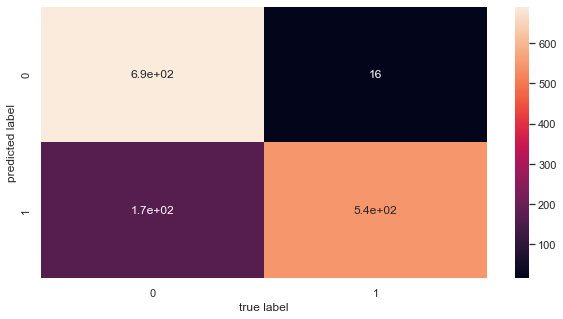

In [119]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [120]:
#evaluating the model
model_name = 'Naive Bayes - without balancing'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(y_test,y_test_pred)
f_score = f1_score(y_test, y_test_pred, average='weighted')
precision = precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185
8,Random Forest - without balancing,0.999911,0.995455,0.995455,0.995100,0.575845,0.419718
9,Random Forest - Random Over Sampling,1.000000,0.924026,0.930027,0.959169,0.064121,0.914215


In [121]:
# Naive Bayes oversampling
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3, random_state=50)

gnb = GaussianNB()
model = gnb.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Naive Bayes - Random Over Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    921371
           1       0.13      0.68      0.22      4826

    accuracy                           0.97    926197
   macro avg       0.56      0.83      0.60    926197
weighted avg       0.99      0.97      0.98    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185
8,Random Forest - without balancing,0.999911,0.995455,0.995455,0.995100,0.575845,0.419718
9,Random Forest - Random Over Sampling,1.000000,0.924026,0.930027,0.959169,0.064121,0.914215


In [122]:

#Undersampling Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_rus,y_rus, test_size=0.3, random_state=50)

gnb = GaussianNB()

model = gnb.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Naive Bayes - Random Under Sampling'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    921371
           1       0.13      0.70      0.22      4826

    accuracy                           0.97    926197
   macro avg       0.56      0.84      0.60    926197
weighted avg       0.99      0.97      0.98    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185
8,Random Forest - without balancing,0.999911,0.995455,0.995455,0.995100,0.575845,0.419718
9,Random Forest - Random Over Sampling,1.000000,0.924026,0.930027,0.959169,0.064121,0.914215


In [123]:
#Naive BAyes Smote
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.3, random_state=50)

gnb = GaussianNB()

model = gnb.fit(X_train,y_train)

test_pred = model.predict(test_input)

print(classification_report(test_output, test_pred))

#evaluating the model
model_name = 'Naive Bayes - SMOTE'
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

acc_score = accuracy_score(test_output,test_pred)
f_score = f1_score(test_output, test_pred, average='weighted')
precision = precision_score(test_output, test_pred)
recall = metrics.recall_score(test_output,test_pred)
#adding claculations to dataframe
model_eval_data = [model_name, train_score, test_score, acc_score, f_score, precision, recall]
model_eval_dict = {evaluate_df.columns[i]:model_eval_data[i] for i in range(len(model_eval_data))}
evaluate_df = evaluate_df.append(model_eval_dict, ignore_index=True)

evaluate_df

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    921371
           1       0.14      0.75      0.23      4826

    accuracy                           0.97    926197
   macro avg       0.57      0.86      0.61    926197
weighted avg       0.99      0.97      0.98    926197



,Model Name,Training Score,Testing Score,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.994339,0.994311,0.994311,0.991952,0.000000,0.000000
1,Logistic Regression - Random Under Sampling,0.849001,0.849050,0.946634,0.968077,0.070243,0.755284
2,Logistic Regression - Random Over Sampling,0.852612,0.841145,0.947541,0.968566,0.071533,0.756942
3,Logistic Regression - SMOTE,0.848988,0.859056,0.946962,0.968253,0.070673,0.755491
4,Support Vector Machine,0.871640,0.882311,0.882311,0.881706,0.945724,0.811001
5,SVM - Random Over Sampling,0.882428,0.859891,0.939258,0.964121,0.064784,0.793203
6,SVM - Random Under Sampling,0.880237,0.870812,0.947307,0.968461,0.073906,0.790303
7,SVM - SMOTE,0.875868,0.881607,0.951316,0.970613,0.078862,0.781185
8,Random Forest - without balancing,0.999911,0.995455,0.995455,0.995100,0.575845,0.419718
9,Random Forest - Random Over Sampling,1.000000,0.924026,0.930027,0.959169,0.064121,0.914215
